# NN1: Bazowa implemetacja
## Laura Hoang, 313366

Zadanie polega na implementacji sieci neuronowej typu MLP, w której można ustawić: liczbę warstw, liczbę neuronów w każdej z warstw i wagi poszczególnych połączeń, w tym biasów. Sieć ma używać sigmoidalnej funkcji aktywacji. Na wyjściu dopuszczana jest funkcja liniowa.

Implementacja sieci musi być przygotowana w taki sposób, żeby łatwo zmieniać:
- Architekturę, to znaczy liczbę wejść, wyjść, neuronów w warstwach ukrytych.
- Funkcję aktywacji.

Tak przygotowaną implementację należy następnie wykorzystać do rozwiązania zadania regresji na dostarczonych danych. Parametry sieci należy dobrać ręcznie, tak aby uzyskać możliwie dobrze wyniki na zbiorach danych (zbudować po jednej sieci dla każdego zbioru):
- square-simple
- steps-large

Rozważyć architektury sieci:
- jedna warstwa ukryta, 5 neuronów,
- jedna warstwa ukryta, 10 neuronów,
- dwie warstwy ukryte, po 5 neuronów każda.

Aby otrzymać 2 punkty MSE na [nieznormalizowanym] zbiorze testowym nie może przekraczać wartości 9.

Pracę rozpoczynamy od zaimportowania odpowiednich paczek i wczytania danych.

In [1]:
import pandas as pd
import numpy as np
from numpy import exp, array, random, dot, square, subtract

from matplotlib import pyplot as plt

In [2]:
ss_train = pd.read_csv ('square-simple-training.csv', index_col=[0])
ss_test = pd.read_csv ('square-simple-test.csv', index_col=[0])

sl_train = pd.read_csv ('steps-large-training.csv', index_col=[0])
sl_test = pd.read_csv ('steps-large-test.csv', index_col=[0])

## Bazowa implementacja

W przypadku tego zadania nasza funkcja aktywacji to **sigmoid**.

In [3]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

Implementacja ogólnej architektury sieci wygląda następjąco: 

In [4]:
class NeuralNetwork():
    def __init__(self, number_of_neurons=[], synaptic_weights=[], biases=[], activation=sigmoid):
        self.number_of_neurons = number_of_neurons  # liczba neuronów w każdej warstwie (wliczając wejście i wyjście)
        self.synaptic_weights = synaptic_weights    # lista macierzy (2-wymiarowe tablice) z wagami do każdej warstwy
        self.biases = biases                        # lista biasów (2-wymiarowe tablice) do każdej warstwy
        self.activation = activation                # funkcja aktywacji

    def mse(self, real_output, predicted_output):
        return square(subtract(real_output,predicted_output)).mean()

    def predict(self, input, output):
        number_of_hidden_layers = len(self.number_of_neurons) - 2   # liczymy warstwy ukryte (czyli bez wejścia i wyjścia)
        outputP = input

        for layer in range(number_of_hidden_layers):                # iteracyjnie przechodzimy po każdej warstwie ukrytej
            outputP = dot(outputP, self.synaptic_weights[layer]) + self.biases[layer]
            outputP = self.activation(outputP)                      # ze wzoru: sigma( W*X + b)
        
        outputP = dot(outputP,self.synaptic_weights[-1]) + self.biases[-1]  # na koniec funkcja liniowa
        return outputP

## Square-simple

In [5]:
x = array(ss_train[['x']])
y = array(ss_train[['y']])

x_test = array(ss_test[['x']])
y_test = array(ss_test[['y']])

### Architektura: 1 warstwa ukryta z 5 neuronami

In [6]:
number_of_neurons = [1, 5, 1] # input:1, L1:5, output:1

# input-L1
weights_1 = np.array([[0.96, -0.96, -0.96, -0.96, -0.96]])
biases_1 = np.array([[-2.88, -2.88, -2.88, -2.88, -2.88]])

# L1-output
weights_2 = np.array([[2000], [500], [500], [500], [500]])
biases_2 = np.array([[-340]])

synaptic_weights = [weights_1, weights_2]
biases = [biases_1, biases_2]

nn = NeuralNetwork(number_of_neurons, synaptic_weights, biases, sigmoid)

#### Dane treningowe

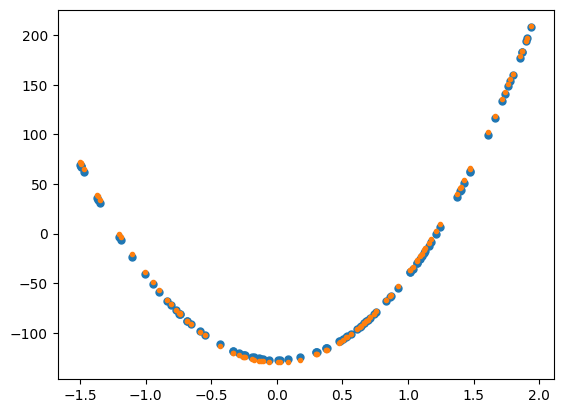

MSE:  4.465885119587754


In [7]:
y_pred = nn.predict(x,y)

plt.plot(x, y_pred, 'o', markersize=5)
plt.plot(x, y, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y, y_pred))

#### Dane testowe

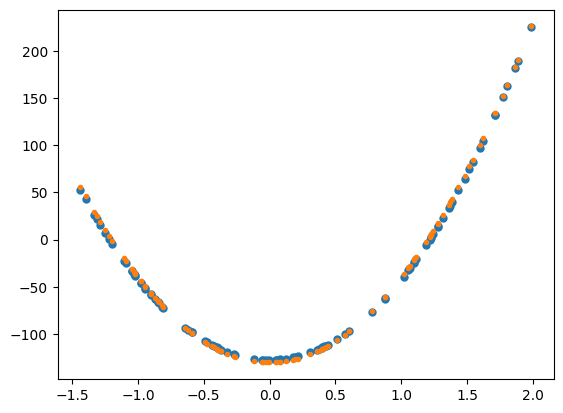

MSE:  5.252015227662273


In [8]:
y_test_pred = nn.predict(x_test,y_test)

plt.plot(x_test, y_test_pred, 'o', markersize=5)
plt.plot(x_test, y_test, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y_test, y_test_pred))

### Architektura: 1 warstwa ukryta z 10 neuronami

In [9]:
number_of_neurons = [1, 10, 1] # input:1, L1:10, output:1

# input-L1
weights_1 = np.array([[0.96, -0.96, -0.96, -0.96, -0.96, -0.96, 0.96, 0.96, 0.96, 0.96]])
biases_1 = np.array([[-2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88]])

# L1-output
weights_2 = np.array([[400], [400], [400], [400], [400], [400], [400], [400], [400], [400]])
biases_2 = np.array([[-340]])

synaptic_weights = [weights_1, weights_2]
biases = [biases_1, biases_2]

nn = NeuralNetwork(number_of_neurons, synaptic_weights, biases, sigmoid)

#### Dane treningowe

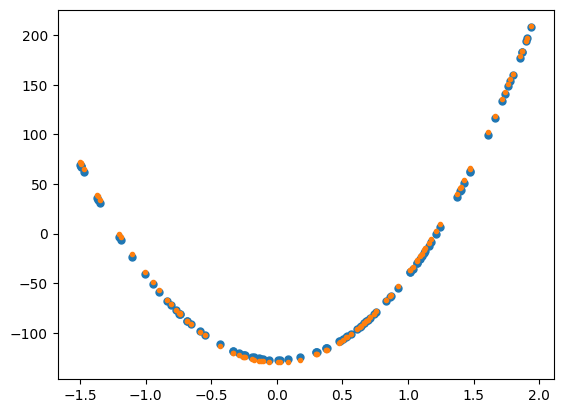

MSE:  4.46588511958776


In [10]:
y_pred = nn.predict(x,y)

plt.plot(x, y_pred, 'o', markersize=5)
plt.plot(x, y, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y, y_pred))

#### Dane testowe

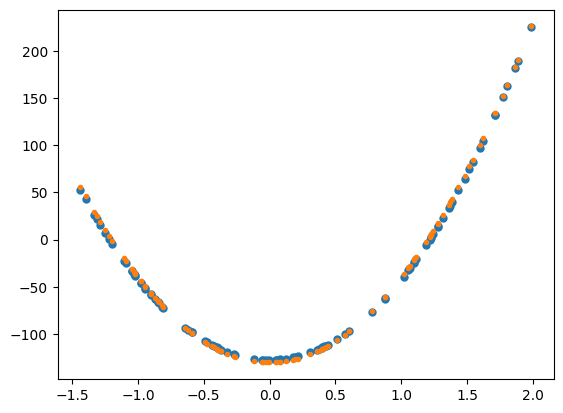

MSE:  5.252015227662258


In [11]:
y_test_pred = nn.predict(x_test,y_test)

plt.plot(x_test, y_test_pred, 'o', markersize=5)
plt.plot(x_test, y_test, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y_test, y_test_pred))

### Architektura: 2 warstwy ukryte po 5 neuronów

In [12]:
number_of_neurons = [1, 5, 5, 1] #input:1, L1:5, L2:5, output:1

# input-L1
weights_1 = np.array([[1, -2.2, -1, 1, -1]])
biases_1 = np.array([[-2.9, -2.9, -2.9, -2.9, -2.9]])

# L1-L2
weights_2 = np.array([[3.1, 0, 0, 0, 0], [0, 3.2, 0, 0, 0], [0, 0, 3.2, 0, 0], [0, 0, 0, 3.1, 0], [0, 0, 0, 0, 3.1]])
biases_2 = np.array([[0, 0, 0, 0, 0]])

# L2-output
weights_3 = np.array([[2000], [500], [500], [500], [500]])
biases_3 = np.array([[-2300]])

synaptic_weights = [weights_1, weights_2, weights_3]
biases = [biases_1, biases_2, biases_3]

nn = NeuralNetwork(number_of_neurons, synaptic_weights, biases, sigmoid)

#### Dane treningowe

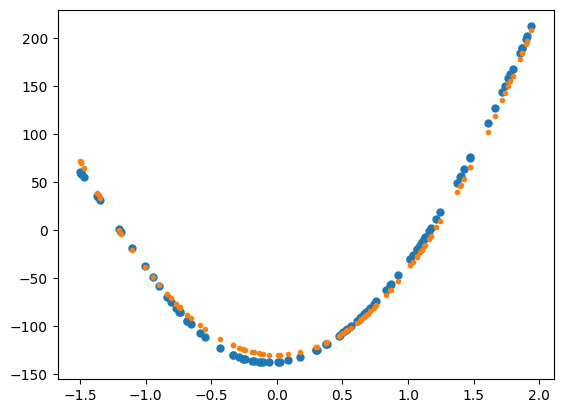

MSE:  45.430280556375784


In [13]:
y_pred = nn.predict(x,y)

plt.plot(x, y_pred, 'o', markersize=5)
plt.plot(x, y, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y, y_pred))

#### Dane testowe

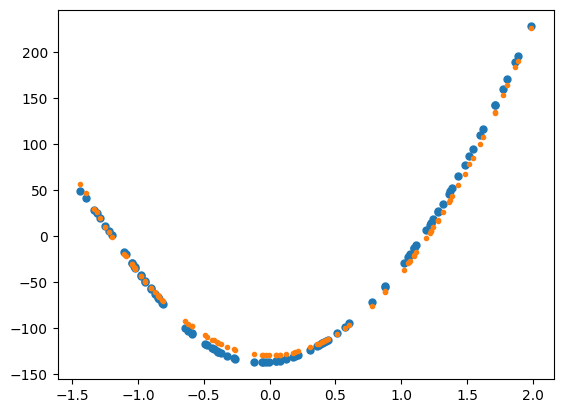

MSE:  41.99819194758513


In [14]:
y_test_pred = nn.predict(x_test,y_test)

plt.plot(x_test, y_test_pred, 'o', markersize=5)
plt.plot(x_test, y_test, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y_test, y_test_pred))

## Steps-large

In [15]:
x = array(sl_train[['x']])
y = array(sl_train[['y']])

x_test = array(sl_test[['x']])
y_test = array(sl_test[['y']])

### Architektura: 1 warstwa ukryta z 5 neuronami

In [16]:
number_of_neurons = [1, 5, 1] # input:1, L1:5, output:1

# input-L1
weights_1 = np.array([[500, 500, 500, 500, 500]])
biases_1 = np.array([[-250, -750, 250, 250, 250]])

# L1-output
weights_2 = np.array([[80], [80], [80], [0], [0]])
biases_2 = np.array([[-80]])

synaptic_weights = [weights_1, weights_2]
biases = [biases_1, biases_2]

nn = NeuralNetwork(number_of_neurons, synaptic_weights, biases, sigmoid)

#### Dane treningowe

C:\Users\laura\AppData\Local\Temp\ipykernel_31624\2306381509.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))


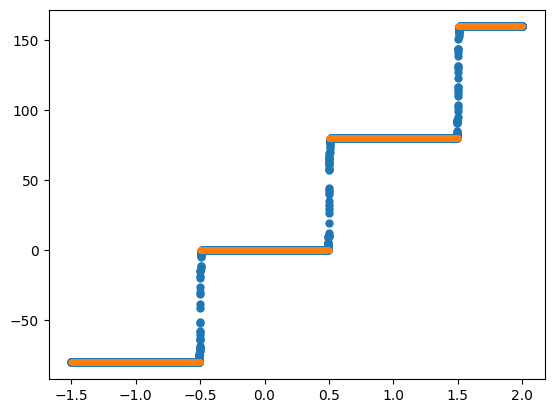

MSE:  4.190735668232934


In [17]:
y_pred = nn.predict(x,y)

plt.plot(x, y_pred, 'o', markersize=5)
plt.plot(x, y, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y, y_pred))

#### Dane testowe

C:\Users\laura\AppData\Local\Temp\ipykernel_31624\2306381509.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))


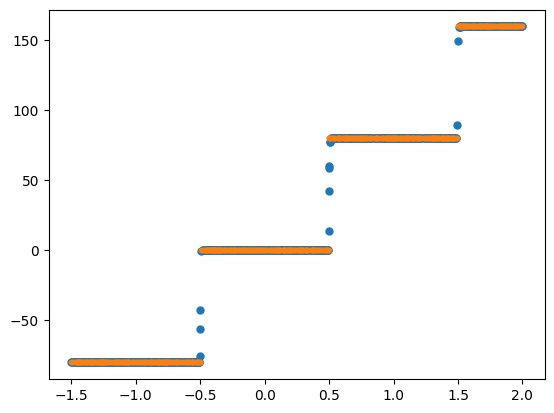

MSE:  4.655249551651936


In [18]:
y_test_pred = nn.predict(x_test,y_test)

plt.plot(x_test, y_test_pred, 'o', markersize=5)
plt.plot(x_test, y_test, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y_test, y_test_pred))

### Architektura: 1 warstwa ukryta z 10 neuronami

In [19]:
number_of_neurons = [1, 10, 1] # input:1, L1:10, output:1

# input-L1
weights_1 = np.array([[500, 500, 500, 500, 500, 500, 500, 500, 500, 500]])
biases_1 = np.array([[-250, -750, 250, 250, 250, 250, 250, 250, 250, 250]])

# L1-output
weights_2 = np.array([[80], [80], [80], [80], [-480], [80], [80], [80], [80], [80]])
biases_2 = np.array([[-80]])

synaptic_weights = [weights_1, weights_2]
biases = [biases_1, biases_2]

nn = NeuralNetwork(number_of_neurons, synaptic_weights, biases, sigmoid)

#### Dane treningowe

C:\Users\laura\AppData\Local\Temp\ipykernel_31624\2306381509.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))


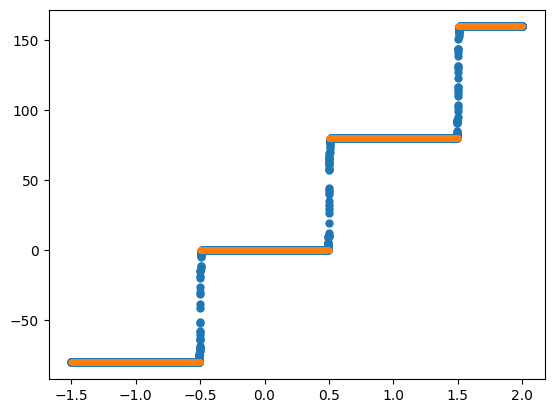

MSE:  4.190735668232936


In [20]:
y_pred = nn.predict(x,y)

plt.plot(x, y_pred, 'o', markersize=5)
plt.plot(x, y, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y, y_pred))

#### Dane testowe

C:\Users\laura\AppData\Local\Temp\ipykernel_31624\2306381509.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))


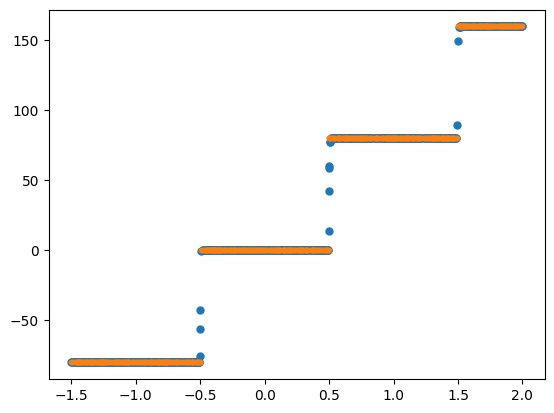

MSE:  4.655249551651932


In [21]:
y_test_pred = nn.predict(x_test,y_test)

plt.plot(x_test, y_test_pred, 'o', markersize=5)
plt.plot(x_test, y_test, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y_test, y_test_pred))

### Architektura: 2 warstwy ukryte po 5 neuronów

In [22]:
number_of_neurons = [1, 5, 5, 1] #input:1, L1:5, L2:5, output:1

# input-L1
weights_1 = np.array([[500, 500, 500, 500, 500]])
biases_1 = np.array([[-250, -750, 250, 250, 250]])

# L1-L2
weights_2 = np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]])
biases_2 = np.array([[0, 0, 0, 0, 0]])

# L2-output
weights_3 = np.array([[345], [345], [345], [-345], [345]])
biases_3 = np.array([[-596]])

synaptic_weights = [weights_1, weights_2, weights_3]
biases = [biases_1, biases_2, biases_3]

nn = NeuralNetwork(number_of_neurons, synaptic_weights, biases, sigmoid)

#### Dane treningowe

C:\Users\laura\AppData\Local\Temp\ipykernel_31624\2306381509.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))


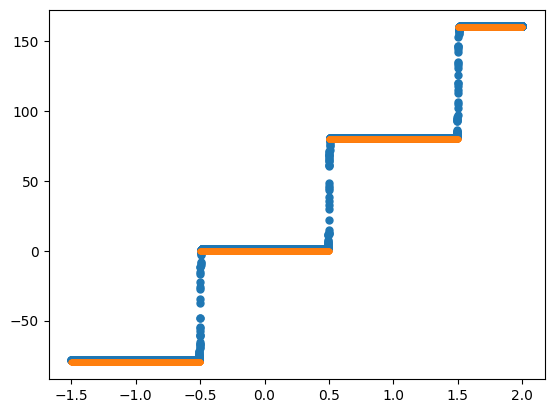

MSE:  5.550755875891116


In [23]:
y_pred = nn.predict(x,y)

plt.plot(x, y_pred, 'o', markersize=5)
plt.plot(x, y, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y, y_pred))

#### Dane testowe

C:\Users\laura\AppData\Local\Temp\ipykernel_31624\2306381509.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))


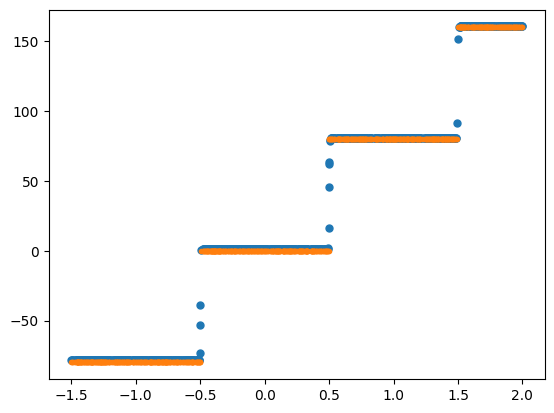

MSE:  6.059979340702833


In [24]:
y_test_pred = nn.predict(x_test,y_test)

plt.plot(x_test, y_test_pred, 'o', markersize=5)
plt.plot(x_test, y_test, 'o', markersize=3)
plt.show()

print('MSE: ', nn.mse(y_test, y_test_pred))

## Podsumowanie

Wartość MSE na zbiorach treningowych i testowych są zbliżone do siebie.

W przypadku architektury "1x5" i "1x10", wagi zostały dobrane identycznie (tylko na innej liczbie neuronów), co w efekcie dało tą samą wartość MSE (dla treningowego i testowego).

Architektura "2x5" dla zbioru square-simple wypadła najgorzej z wszystkich modeli (pod kątem wartości MSE).

| MSE: train    | 1x5    | 1x10   | 2x5     |
|---------------|--------|--------|---------|
| square-simple | 4.4659 | 4.4659 | 45.4303 |
| steps-large   | 4.1907 | 4.1907 | 5.5508  |

MSE wszystkich modeli dla zbiorów testowych (poza "2x5" dla square-simple) nie przekracza 9.

| MSE: test     | 1x5    | 1x10   | 2x5     |
|---------------|--------|--------|---------|
| square-simple | **5.252**  | **5.252**  | 41.9982 |
| steps-large   | **4.6552** | **4.6552** | **6.05998** |

**WNIOSEK:** W tym przypadku lepiej sprawdzają się prostsze modele (zwiększanie liczby warstw nie ulepsza modelu, a zwiększenie liczby neuronów nie zmienia sytuacji).